<a href="https://colab.research.google.com/github/TPVardhan/DogBreed_ImageClassification/blob/main/Project_11702397.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import layers, datasets, Model

In [46]:
import os
import cv2
import pickle

#importing train_test_split
from sklearn.model_selection import train_test_split

#importing PIL
import PIL

from sklearn.datasets import make_blobs

In [47]:
#mounting to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
from tensorflow.keras import preprocessing
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [49]:
Image_data=[]
label1=[]
url='/content/drive/My Drive/'
path1=os.path.join(url,"Images")
categories=os.listdir(path1)
for folder in categories:
  path2=os.path.join(path1,folder)
  for image_name in os.listdir(path2):
    image=cv2.imread(os.path.join(path2,image_name),cv2.IMREAD_ANYCOLOR)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(50,50))
    image=np.array(image,dtype=np.int64)
    Image_data.append(image)
    label1.append(categories.index(folder))

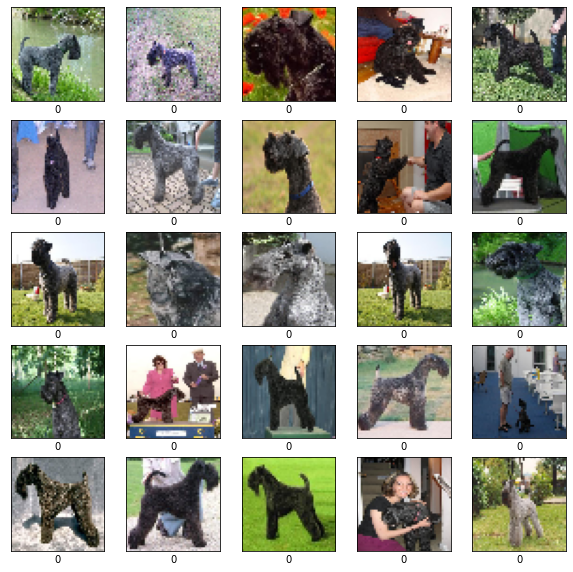

In [71]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(Image_data[i])
  plt.yticks([])
  plt.xticks([])
  plt.xlabel(label1[i])
plt.show()

In [72]:
#For running this first create the folder in Colab
label2=[]
for j,k in zip(Image_data,label1):
  j=np.array(j)
  j=j.reshape((1,)+j.shape)
  i = 0
  for batch in datagen.flow(j, batch_size=1,save_to_dir='sai', save_prefix=k, save_format='jpeg'):
    i += 1
    if i > 7:
      break 

In [73]:
Image_data3=[]
label3=[]
url='/content'
path=os.path.join(url,'sai')
list_images=os.listdir(path)
np.random.shuffle(list_images)
for image_name in list_images[0:15000]:
  image=cv2.imread(os.path.join(path,image_name),cv2.IMREAD_GRAYSCALE)
  image=np.array(image,dtype=np.int64)
  Image_data3.append(image)
  label3.append(int(image_name[0]))

In [74]:
#dividing the data into test and train
(X_train,X_test,Y_train,Y_test)=train_test_split(Image_data3,label3,test_size=0.2)

In [75]:
X_train=np.array(X_train).reshape(-1,50,50,1)/255.0
X_test=np.array(X_test).reshape(-1,50,50,1)/255.0

Y_train=np.array(Y_train,dtype=np.int64)
Y_test=np.array(Y_test,dtype=np.int64)

In [85]:
#Creating the normal model
model=keras.Sequential(name="Image_Classification")
model.add(layers.Flatten(input_shape=(50,50)))
model.add(layers.Dense(300,activation='relu',name='Hidden1'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(25,activation='relu',name='Hidden2'))
model.add(layers.Dense(5,activation='softmax',name='Output_layer'))
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])
output=model.fit(X_train,Y_train,batch_size=40,epochs=100,validation_split=0.3,validation_data=[X_test,Y_test])

Epoch 1/100
210/210 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0305 - val_loss: nan - val_accuracy: 0.0269
Epoch 2/100
210/210 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0292 - val_loss: nan - val_accuracy: 0.0269
Epoch 3/100
210/210 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0292 - val_loss: nan - val_accuracy: 0.0269
Epoch 4/100
210/210 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0292 - val_loss: nan - val_accuracy: 0.0269
Epoch 5/100
210/210 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0292 - val_loss: nan - val_accuracy: 0.0269
Epoch 6/100
210/210 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0292 - val_loss: nan - val_accuracy: 0.0269
Epoch 7/100
210/210 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0292 - val_loss: nan - val_accuracy: 0.0269
Epoch 8/100
210/210 [====================

In [86]:
model.summary()

Model: "Image_Classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 2500)              0         
_________________________________________________________________
Hidden1 (Dense)              (None, 300)               750300    
_________________________________________________________________
dropout_12 (Dropout)         (None, 300)               0         
_________________________________________________________________
Hidden2 (Dense)              (None, 25)                7525      
_________________________________________________________________
Output_layer (Dense)         (None, 5)                 130       
Total params: 757,955
Trainable params: 757,955
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.evaluate(X_test,Y_test,batch_size=10)

300/300 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0277


[nan, 0.027666667476296425]

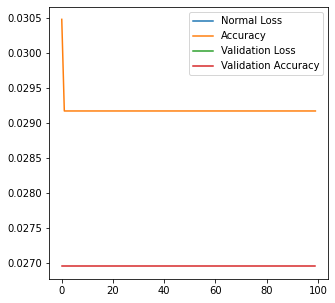

In [100]:
plt.figure(figsize=(5,5))
plt.plot(output.history['loss'],label='Normal Loss')
plt.plot(output.history['accuracy'],label="Accuracy")
plt.plot(output.history['val_loss'],label="Validation Loss")
plt.plot(output.history['val_accuracy'],label="Validation Accuracy")
plt.legend()
plt.show()

In [98]:
img=Y_train[0]

In [99]:
img.shape

()